In [1]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://www.pararius.com/apartments/amsterdam"

In [3]:
page = requests.get(url)

In [4]:
Spaghetti = BeautifulSoup(page.content,'html.parser')

In [5]:
lists = Spaghetti.find_all('section',class_="listing-search-item") 

In [6]:
with open('Apartment Rent.csv','w',encoding = 'utf8', newline = '') as f:
    mywriter = writer(f)
    header = ['Title','Location','Price','Area','Number_of_Rooms']
    mywriter.writerow(header)
    for list in lists:
        title = list.find('a',class_= "listing-search-item__link--title").text.replace('\n','')
        location = list.find('div',class_= "listing-search-item__sub-title").text.replace('\n','')
        price = list.find('div',class_= "listing-search-item__price").text.replace('\n','')
        area = list.find('li',class_= "illustrated-features__item--surface-area").text.replace('\n','')
        number_of_rooms = list.find('li',class_= "illustrated-features__item--number-of-rooms").text.replace('\n','')
        apartment_feautures = [title,location,price,area,number_of_rooms]
        mywriter.writerow(apartment_feautures)


In [7]:
Apartment_Rents = pd.read_csv("Apartment Rent.csv")
Apartment_Rents.head()

,Title,Location,Price,Area,Number_of_Rooms
0,Apartment Bosboom Tous...,1054 AT Amsterdam (Helmersbuurt) ...,"€4,500 per month",155 m²,5 rooms
1,Apartment Oostenburger...,1018 MN Amsterdam (Oostelijke Eila...,"€3,500 per month",140 m²,4 rooms
2,Apartment Bilderdijkst...,1053 LE Amsterdam (Van Lennepbuurt...,"€1,750 per month",58 m²,2 rooms
3,Apartment Korte Koning...,1011 GA Amsterdam (Nieuwmarkt/Last...,"€2,050 per month",120 m²,2 rooms
4,Apartment Overtoom ...,1054 HR Amsterdam (Helmersbuurt) ...,"€2,350 per month",74 m²,3 rooms


In [8]:
Apartment_Rents.describe()

,Title,Location,Price,Area,Number_of_Rooms
count,32,32,32,32,32
unique,30,31,21,27,5
top,Apartment Herengracht ...,1015 BT Amsterdam (Grachtengordel-...,"€1,750 per month",60 m²,3 rooms
freq,2,2,6,2,13


In [9]:
Apartment_Rents.dtypes

Title              object
Location           object
Price              object
Area               object
Number_of_Rooms    object
dtype: object

In [10]:
Apartment_Rents['Price_replace'] = Apartment_Rents['Price'].str.replace('€','').str.replace(',','').str.replace('per month','')
Apartment_Rents['Price_replace'] = pd.to_numeric(Apartment_Rents['Price_replace'])
Apartment_Rents['Price_replace'].dtype

dtype('int64')

In [11]:
Apartment_Rents['Area_Replace'] = Apartment_Rents['Area'].str.replace('m²','')
Apartment_Rents['Area_Replace'] = pd.to_numeric(Apartment_Rents['Area_Replace'])
Apartment_Rents['Area_Replace'].dtype

dtype('int64')

In [12]:
Apartment_Rents['Number_of_Rooms_Replace'] = Apartment_Rents['Number_of_Rooms'].str.replace('rooms','').str.replace('room','')
Apartment_Rents['Number_of_Rooms_Replace'] = pd.to_numeric(Apartment_Rents['Number_of_Rooms_Replace'])
Apartment_Rents['Number_of_Rooms_Replace'].dtype

dtype('int64')

In [13]:
Apartment_Rents.head()

,Title,Location,Price,Area,Number_of_Rooms,Price_replace,Area_Replace,Number_of_Rooms_Replace
0,Apartment Bosboom Tous...,1054 AT Amsterdam (Helmersbuurt) ...,"€4,500 per month",155 m²,5 rooms,4500,155,5
1,Apartment Oostenburger...,1018 MN Amsterdam (Oostelijke Eila...,"€3,500 per month",140 m²,4 rooms,3500,140,4
2,Apartment Bilderdijkst...,1053 LE Amsterdam (Van Lennepbuurt...,"€1,750 per month",58 m²,2 rooms,1750,58,2
3,Apartment Korte Koning...,1011 GA Amsterdam (Nieuwmarkt/Last...,"€2,050 per month",120 m²,2 rooms,2050,120,2
4,Apartment Overtoom ...,1054 HR Amsterdam (Helmersbuurt) ...,"€2,350 per month",74 m²,3 rooms,2350,74,3


In [14]:
Apartment_Rents.drop(['Price','Area','Number_of_Rooms'],axis = 1)

,Title,Location,Price_replace,Area_Replace,Number_of_Rooms_Replace
0,Apartment Bosboom Tous...,1054 AT Amsterdam (Helmersbuurt) ...,4500,155,5
1,Apartment Oostenburger...,1018 MN Amsterdam (Oostelijke Eila...,3500,140,4
2,Apartment Bilderdijkst...,1053 LE Amsterdam (Van Lennepbuurt...,1750,58,2
3,Apartment Korte Koning...,1011 GA Amsterdam (Nieuwmarkt/Last...,2050,120,2
4,Apartment Overtoom ...,1054 HR Amsterdam (Helmersbuurt) ...,2350,74,3
5,Apartment Rijswijkstra...,1062 ES Amsterdam (Westlandgracht)...,1395,60,3
6,Apartment Singel ...,1015 AC Amsterdam (Grachtengordel-...,2200,80,2
7,Apartment Tollensstraa...,1053 RS Amsterdam (Kinkerbuurt) ...,1550,40,2
8,Apartment Papaverweg ...,1032 KH Amsterdam (Volewijck),1275,40,2
9,Apartment Galjootstraa...,1086 VE Amsterdam (IJburg West) ...,1750,85,3


In [15]:
Apartment_Rent = Apartment_Rents.drop(['Price','Area','Number_of_Rooms'],axis = 1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp/ipykernel_62912/3741559782.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=45);


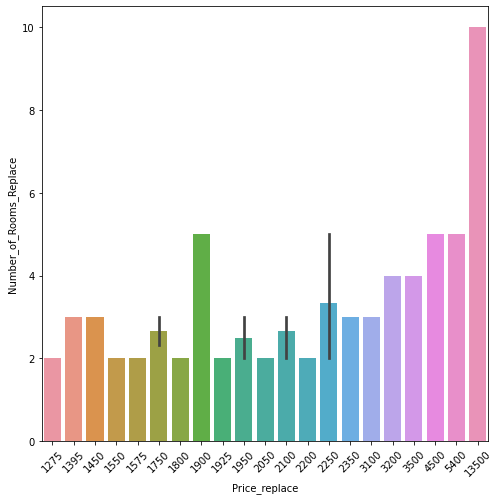

In [16]:
plt.figure(figsize=[8,8]);
sns.barplot(Apartment_Rent['Price_replace'],Apartment_Rent['Number_of_Rooms_Replace']);
plt.xticks(Rotation=45);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp/ipykernel_62912/2714925442.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=45);


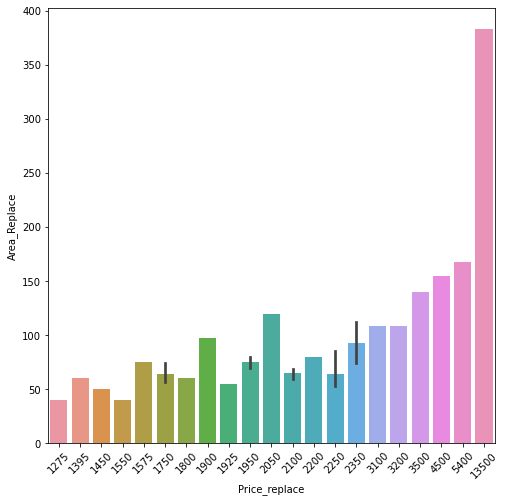

In [17]:
plt.figure(figsize=[8,8]);
sns.barplot(Apartment_Rent['Price_replace'],Apartment_Rent['Area_Replace']);
plt.xticks(Rotation=45);